In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn. model_selection import GridSearchCV
import os

In [8]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

In [9]:
df = pd.read_csv("data/BigData/체질검사.csv")
df_x=df.drop('FAT',axis=1)
df_y=df['FAT']

# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=23)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(176, 13)
train data Y size :(176,)
test data X size :(76, 13)
test data Y size :(76,)


In [12]:
knn_uncustomized = KNeighborsRegressor()
knn_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set  :{:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.737
Score on test set  :0.569


In [14]:
knn_uncustomized = KNeighborsRegressor(n_neighbors=1)
knn_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set  :{:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set  :0.269


In [15]:
knn_uncustomized = KNeighborsRegressor(n_neighbors=5)
knn_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set  :{:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.737
Score on test set  :0.569


In [13]:
train_score=[]; test_score=[]; sub_score=[]

para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))

    
df_score_knn = pd.DataFrame()
df_score_knn['Neighbors'] = para_n_neighbors
df_score_knn['TrainScore'] = train_score
df_score_knn['TestScore']=test_score

df_score_knn.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,0.269
1,2,0.835,0.416
2,3,0.796,0.462
3,4,0.760,0.519
4,5,0.737,0.569
5,6,0.719,0.555
6,7,0.693,0.549
7,8,0.677,0.541
8,9,0.660,0.541
9,10,0.644,0.553


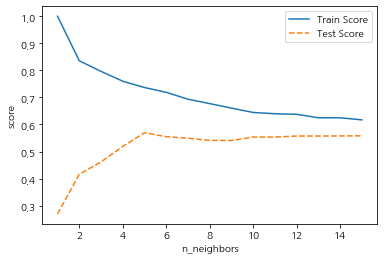

In [18]:
plt.plot(para_n_neighbors, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_neighbors, test_score, linestyle="--", label ="Test Score")
plt.ylabel("score"); plt.xlabel("n_neighbors")
plt.legend()

In [34]:
train_score=[]; test_score=[]


# 이웃수 : 1 ~10
para_n_neighbors = [i for i in range(1,11)]*2

# 가중치(uniform, distance)
para_weights = (['uniform']*10) + (['distance']*10)

# zip(list1, list2, ---)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
for(v_n_neighbors,v_weights) in zip(para_n_neighbors, para_weights):
    knn=KNeighborsRegressor(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_weight = pd.DataFrame()
df_score_weight['Neighbors'] = para_n_neighbors
df_score_weight['Weights'] = para_weights
df_score_weight['TrainScore'] = train_score
df_score_weight['TestScore']=test_score

df_score_weight.round(3)

df_score_weight_pivot = df_score_weight.pivot(index="Neighbors", columns="Weights", values=['TrainScore','TestScore'])
df_score_weight_pivot.head()

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000  0.269368  0.269368
2                1.0  0.835457  0.428962  0.415880
3                1.0  0.796196  0.476730  0.461610
4                1.0  0.759810  0.537079  0.518702
5                1.0  0.736529  0.578606  0.569499

In [36]:
level0 = df_score_weight_pivot.columns.get_level_values(0)
level1 = df_score_weight_pivot.columns.get_level_values(1)
df_score_weight_pivot.columns = level0 + "_" + level1
df_score_weight_pivot.head()

,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
Neighbors,,,,
1,1.0,1.000000,0.269368,0.269368
2,1.0,0.835457,0.428962,0.415880
3,1.0,0.796196,0.476730,0.461610
4,1.0,0.759810,0.537079,0.518702
5,1.0,0.736529,0.578606,0.569499


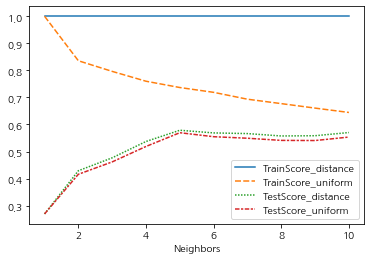

In [37]:
sns.lineplot(data=df_score_weight_pivot)

In [40]:
train_score=[];test_score=[]

para_n_neighbors = [i for i in range(1,11)]*3

para_metric=['minkowski'] * 10 + ['euclidean']*10 + ['manhattan']*10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn=KNeighborsRegressor(weights="uniform", n_neighbors=v_n_neighbors, metric=v_metric)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_metric = pd.DataFrame()
df_score_metric['Neighbors'] = para_n_neighbors
df_score_metric['Metric'] = para_metric
df_score_metric['TrainScore'] = train_score
df_score_metric['TestScore']=test_score

df_score_metric.round(3)

,Neighbors,Metric,TrainScore,TestScore
0,1,minkowski,1.000,0.269
1,2,minkowski,0.835,0.416
2,3,minkowski,0.796,0.462
3,4,minkowski,0.760,0.519
4,5,minkowski,0.737,0.569
5,6,minkowski,0.719,0.555
6,7,minkowski,0.693,0.549
7,8,minkowski,0.677,0.541
8,9,minkowski,0.660,0.541
9,10,minkowski,0.644,0.553


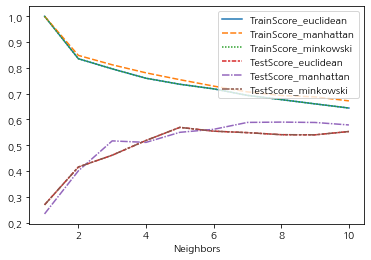

In [43]:
df_score_metric_pivot = df_score_metric.pivot(index="Neighbors", columns="Metric", values=['TrainScore','TestScore'])
level0=df_score_metric_pivot.columns.get_level_values(0)
level1 = df_score_metric_pivot.columns.get_level_values(1)
df_score_metric_pivot.columns = level0+"_"+level1
sns.lineplot(data=df_score_metric_pivot)

최종 모델 생성

In [46]:
knn_final = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='euclidean')
knn_final.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(knn_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(knn_final.score(df_test_x, df_test_y)))

Score on training set : 0.737
Score on test set : 0.569


# 실습

In [48]:
diabets = pd.read_csv("data/BigData/DIABETES.csv")
diabets.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [49]:
# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=23)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(176, 13)
train data Y size :(176,)
test data X size :(76, 13)
test data Y size :(76,)


In [50]:
knn_uncustomized = KNeighborsRegressor()
knn_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set  :{:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.737
Score on test set  :0.569


In [51]:
train_score=[]; test_score=[]; sub_score=[]

para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))

    
df_score_knn = pd.DataFrame()
df_score_knn['Neighbors'] = para_n_neighbors
df_score_knn['TrainScore'] = train_score
df_score_knn['TestScore']=test_score

df_score_knn.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,0.269
1,2,0.835,0.416
2,3,0.796,0.462
3,4,0.760,0.519
4,5,0.737,0.569
5,6,0.719,0.555
6,7,0.693,0.549
7,8,0.677,0.541
8,9,0.660,0.541
9,10,0.644,0.553


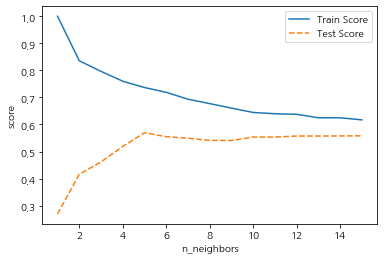

In [52]:
plt.plot(para_n_neighbors, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_neighbors, test_score, linestyle="--", label ="Test Score")
plt.ylabel("score"); plt.xlabel("n_neighbors")
plt.legend()